# Regressão Logistica com Dadaset Titanic

Fonte dos dados: https://www.kaggle.com/c/titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importando Bibliotecas usada para limpeza de dados.

In [4]:
dados_treino = pd.read_csv("train.csv")
dados_teste = pd.read_csv("test.csv")

Lendo os dados de um arquivo CSV.

In [5]:
dados_treino.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mostrando as cinco primeiras linhas do dataframe "dados_treino".

In [7]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analisando informações sobre os dados está sendo usados.

<b>PassengerId</b>: Id do passageiro;<br>
<b>Survived</b>: Composto por 0 e 1, informa se o passageiro sobreviveu ao desastre. O valor 0 é indicado para aqueles que não sobreviveram e o valor 1 para aqueles que sobreviveram;<br>
<b>Pclass</b>: Classe na qual o passageiro estava, temos três valores de classe, 1, 2 e 3;<br>
<b>Name</b>: Nome do passageiro;<br>
<b>Sex</b>: Sexo do passageiro;<br>
<b>Age</b>: Idade do passageiro;<br>
<b>Sibsp</b>: Número de irmãos / cônjuges a bordo;<br>
<b>Parch</b>: Número de pais / filhos a bordo;<br>
<b>Ticket</b>: Número da passagem;<br>
<b>Fare</b>: Preço pago na passagem;<br>
<b>Cabin</b>: Número da cabine;<br>
<b>Embarked</b>: Informa de qual porto o passageiro embarcou. “S” significa Southampton, “C” é referente a Cherbourg e “Q” para Queenstown.<br>

## Ánalise Exploratória dos dados

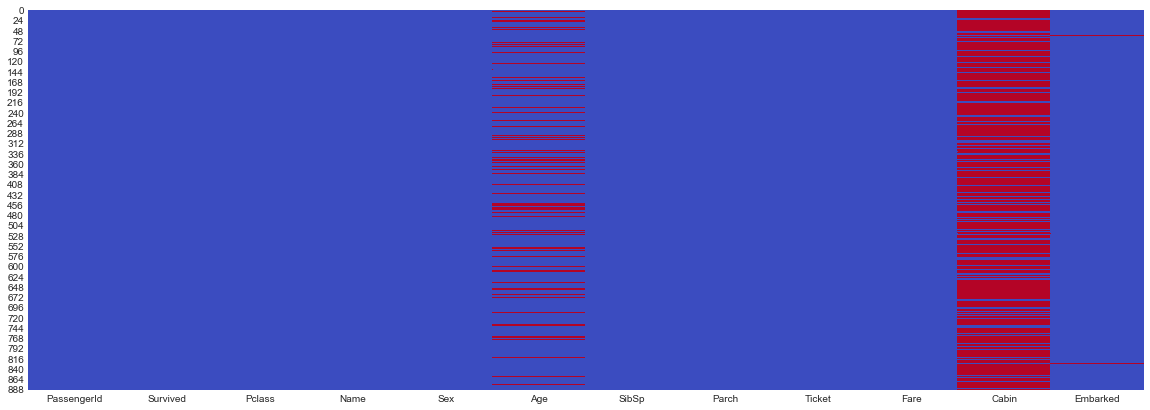

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.heatmap(dados_treino.isnull(), cmap="coolwarm",cbar=False)

Usando o "heatmap" e o método "isnull" do pandas para verificar quais valores são nulos

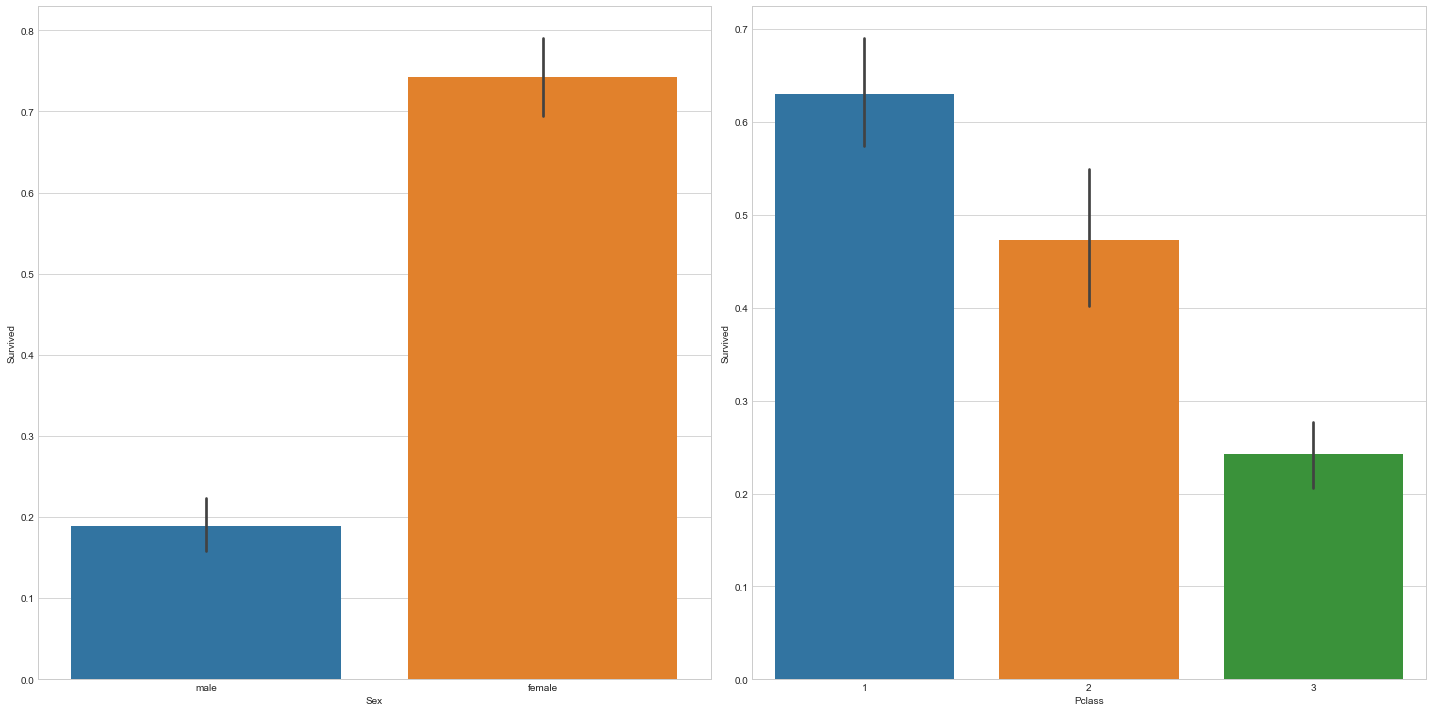

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.barplot(x='Sex',y='Survived',data=dados_treino)
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=dados_treino)
plt.tight_layout()
plt.show()

Verificando gráficamente a relação das váriaveis "Sex" e "Pclass" tem com a variavél "Suvived"

## Limpeza dos dados e Preparação dos Dados

In [11]:
dados_treino.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Retirando do dataframe com método "drop" do pandas, as variaveis nulas e as que não não seram usadas nos modelos de machine learning.

In [12]:
dados_treino.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


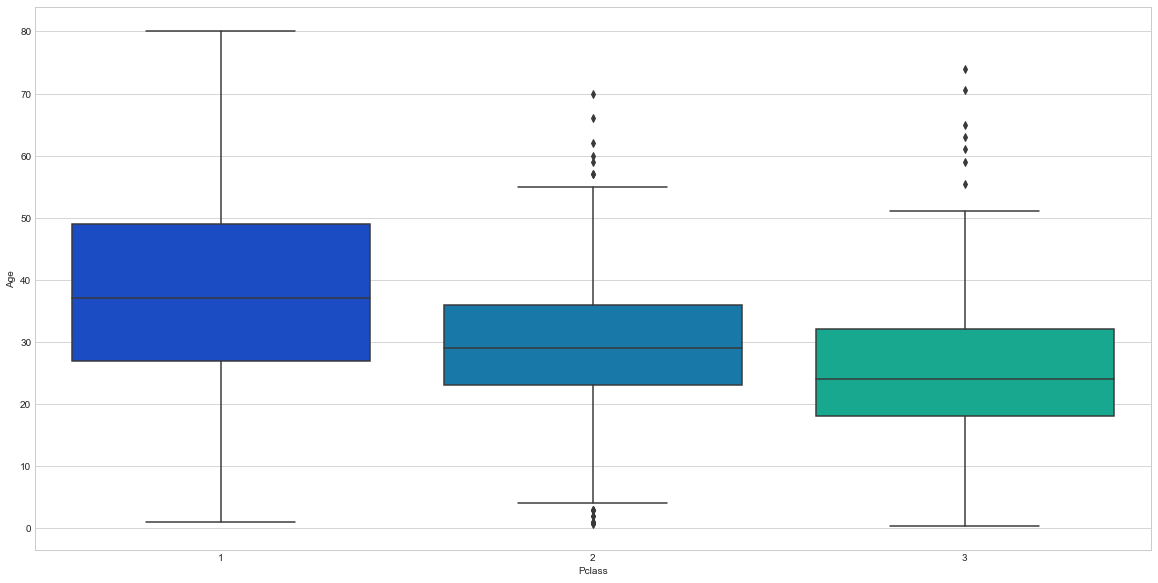

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Pclass',y='Age',data=dados_treino,palette='winter')

Analisando a variavel idade por classe.

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
dados_treino['Age'] = dados_treino[['Age','Pclass']].apply(impute_age,axis=1)

Função que que retonar a todas a idade que estão com valores nulo preenchidas com a média de idade por classe, essas média de idades foram retiradas do boxplot acima "Age x Pclass"

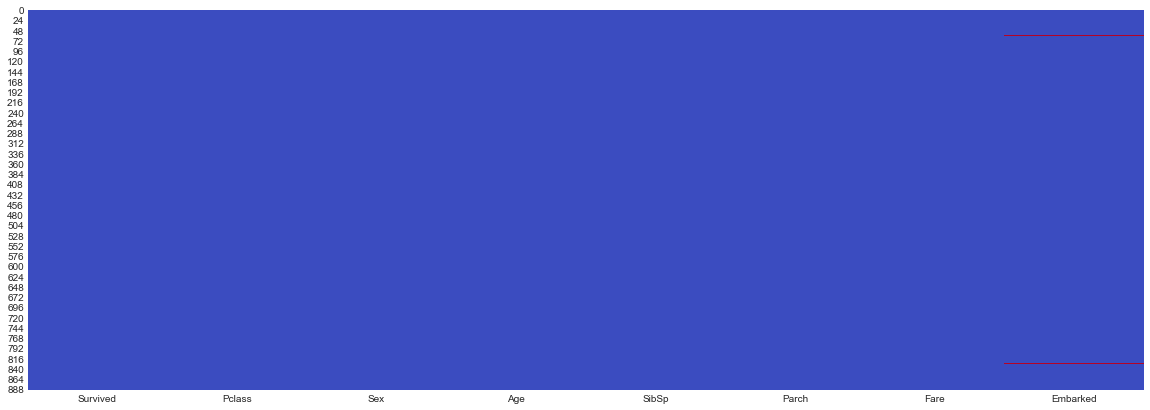

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.heatmap(dados_treino.isnull(), cmap="coolwarm",cbar=False)

In [16]:
dados_treino.dropna(inplace=True)

Retirando todas as linhas null.

In [17]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Mostra que não há nenhuma entrada nula no dadaframe "dados_treino"

## Convertendo recursos categóricos

Necessita converter as variaveis categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.

In [22]:
sex = pd.get_dummies(dados_treino['Sex'])
embarked = pd.get_dummies(dados_treino['Embarked'])
dados_treino.drop(['Sex','Embarked'],axis=1,inplace=True)

In [25]:
dadostreino= pd.concat([dados_treino,sex,embarked],axis=1)
dadostreino.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Construindo um modelo de Regressão Logística

In [26]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(dadostreino.drop('Survived',axis=1), 
                                                    dadostreino['Survived'], test_size=0.30, 
                                                    random_state=101)

Divisão do dataframe em dados de teste e treino

In [27]:
from sklearn.linear_model import LogisticRegression
modelo_log = LogisticRegression()
modelo_log.fit(X_treino,y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predictions = modelo_log.predict(X_teste)

# Avaliação

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predictions))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.83      0.67      0.74       104

avg / total       0.82      0.82      0.82       267

